<a href="https://colab.research.google.com/github/aashwika25/Risk-Of-Heart-Disease-Prediction-Models/blob/main/Risk_Of_Heart_Disease_in_Patients_Aashwika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Heart Attack Prediction Dataset

### Aashwika Khurana

This project focuses on analyzing the Heart Attack Prediction Dataset using Logistic Regression, Baseline Random Forest Classifier, Gradient Boosting and Hyperparameter Tuned Random Forest Classifier. The workflow includes data loading, preprocessing, visualization, model training, and evaluation.

1. **Load the Dataset**
- Read the dataset using Pandas.
- Check for missing values in the dataset.

2. **Data Preprocessing**
- Handle any missing values (if present).
- Normalize the features using StandardScaler to improve the performance of Logistic Regression.

3. **Data Visualization**
- Generate a correlation heatmap to analyze feature relationships.
- Plot histograms to visualize the distribution of features.
- Use boxplots to identify potential outliers in the dataset.

4. ***Train the Model using Logistic Regression, Baseline Random Forest, Gradient Boosting and Hyperparameter Tuned Random Forest ***



# ==============================================
#Step 1: Load and explore the dataset
# ==============================================

Objective:
1. Load the Heart Attack Prediction dataset using Pandas
2. Display the first few rows to understand the structure
3. Check for missing values and duplicates
4. Examine target variable distribution

In [ ]:
import pandas as pd #import pandas library

In [ ]:
df = pd.read_csv('/heart_attack_prediction_dataset.csv.zip')

In [ ]:
#to preview the dataset structure
print(df.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [ ]:
#to get all column names
print(df.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [ ]:
# to get the number of rows and columns in the dataset
print(df.shape)

(8763, 26)


In [ ]:
#checking for missing values
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [ ]:
#checking for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [ ]:
#analyse target variable
unique_values = df['Heart Attack Risk'].nunique()
print(f"Number of unique values in target variable: {unique_values}")
print("Unique values:", df['Heart Attack Risk'].unique())

Number of unique values in target variable: 2
Unique values: [0 1]


# ==============================================
# Step 2: Preprocessing
# ==============================================

Objective:
1. Handle missing values (if any)
2. Convert categorical to numerical (One-Hot Encoding)
3. Normalize features using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Print results
print("\nCategorical Columns: ")
print(f"Count: {len(categorical_cols)}")
print("Columns:", list(categorical_cols))

print("\nNumerical Columns: ")
print(f"Count: {len(numerical_cols)}")
print("Columns:", list(numerical_cols))


Categorical Columns: 
Count: 7
Columns: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']

Numerical Columns: 
Count: 19
Columns: ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']


In [ ]:
#to handle missing values
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [ ]:
#Convert categorical to numerical
print("\n=== Categorical Columns ===")
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


=== Categorical Columns ===
Categorical Columns: Index(['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent',
       'Hemisphere'],
      dtype='object')


In [ ]:
# Perform One-Hot Encoding if categorical columns exist
if len(categorical_columns) > 0:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    print("\nShape after encoding:", df.shape)
else:
    print("No categorical columns to encode")


Shape after encoding: (8763, 12723)


### Deciding on target and features

In [ ]:
X = df.drop(columns=['Heart Attack Risk'])  # Features
y = df['Heart Attack Risk']  # Target variable

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame for visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled Features Sample")
print(X_scaled_df.head())


Scaled Features Sample
        Age  Cholesterol  Heart Rate  Diabetes  Family History   Smoking  \
0  0.625557    -0.641579   -0.147042 -1.369651       -0.986061  0.339157   
1 -1.539322     1.596895    1.118179  0.730113        1.014136  0.339157   
2 -1.539322     0.793023   -0.147042  0.730113       -0.986061 -2.948488   
3  1.425621     1.522691   -0.098380  0.730113        1.014136  0.339157   
4  0.578495     0.718820    0.874867  0.730113        1.014136  0.339157   

    Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0 -1.002857            -1.219867                -1.010838   
1  0.997151             0.819762                -1.418027   
2 -1.002857            -1.219867                -1.372188   
3 -1.002857             0.819762                -0.032188   
4  0.997151            -1.219867                -0.727941   

   Previous Heart Problems  ...  Country_Thailand  Country_United Kingdom  \
0                -0.991704  ...         -0.226605               -0.234564  

# ==============================================
# STEP 3: DATA VISUALIZATION
# ==============================================

Objectives:
1. Check feature correlations with heatmaps
2. Plot histograms for feature distributions
3. Create boxplots for outlier detection
4. Visualize target class distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

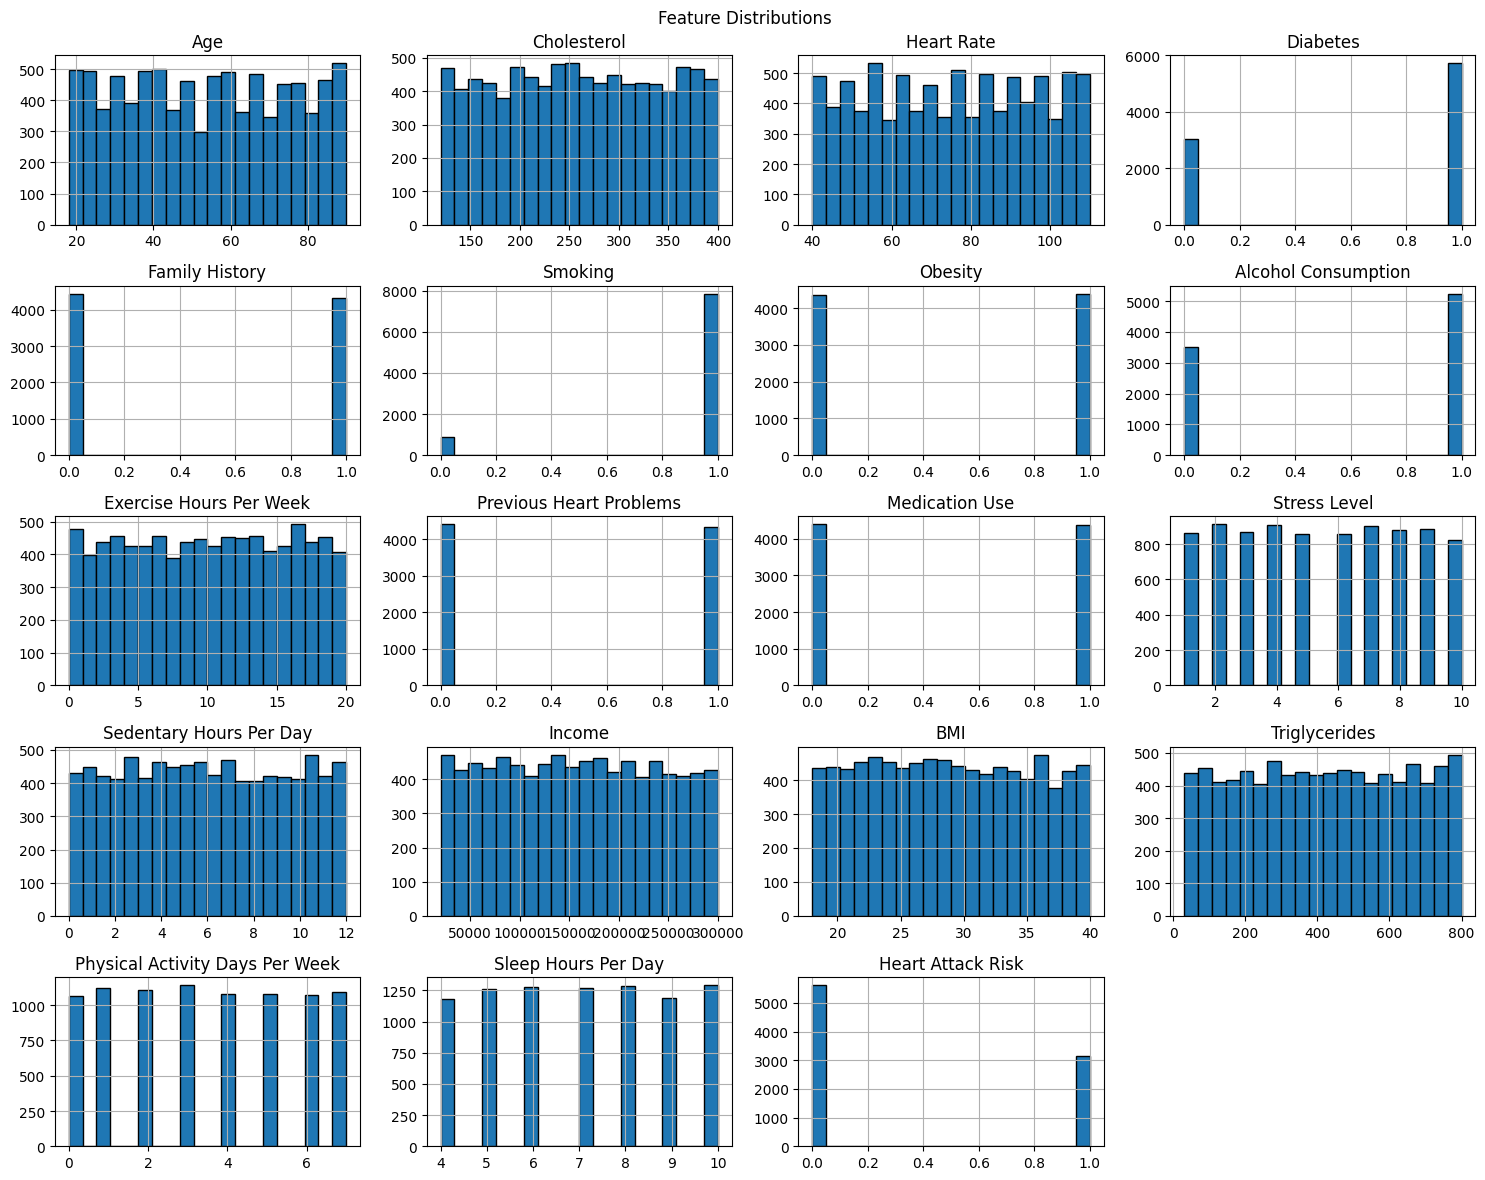

In [ ]:
#Histograms for feature distributions
df.hist(figsize=(15, 12), bins=20, edgecolor="black")  # Create histograms
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

<ipython-input-18-0fdd64b64195>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-18-0fdd64b64195>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-18-0fdd64b64195>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


<Figure size 1500x600 with 0 Axes>

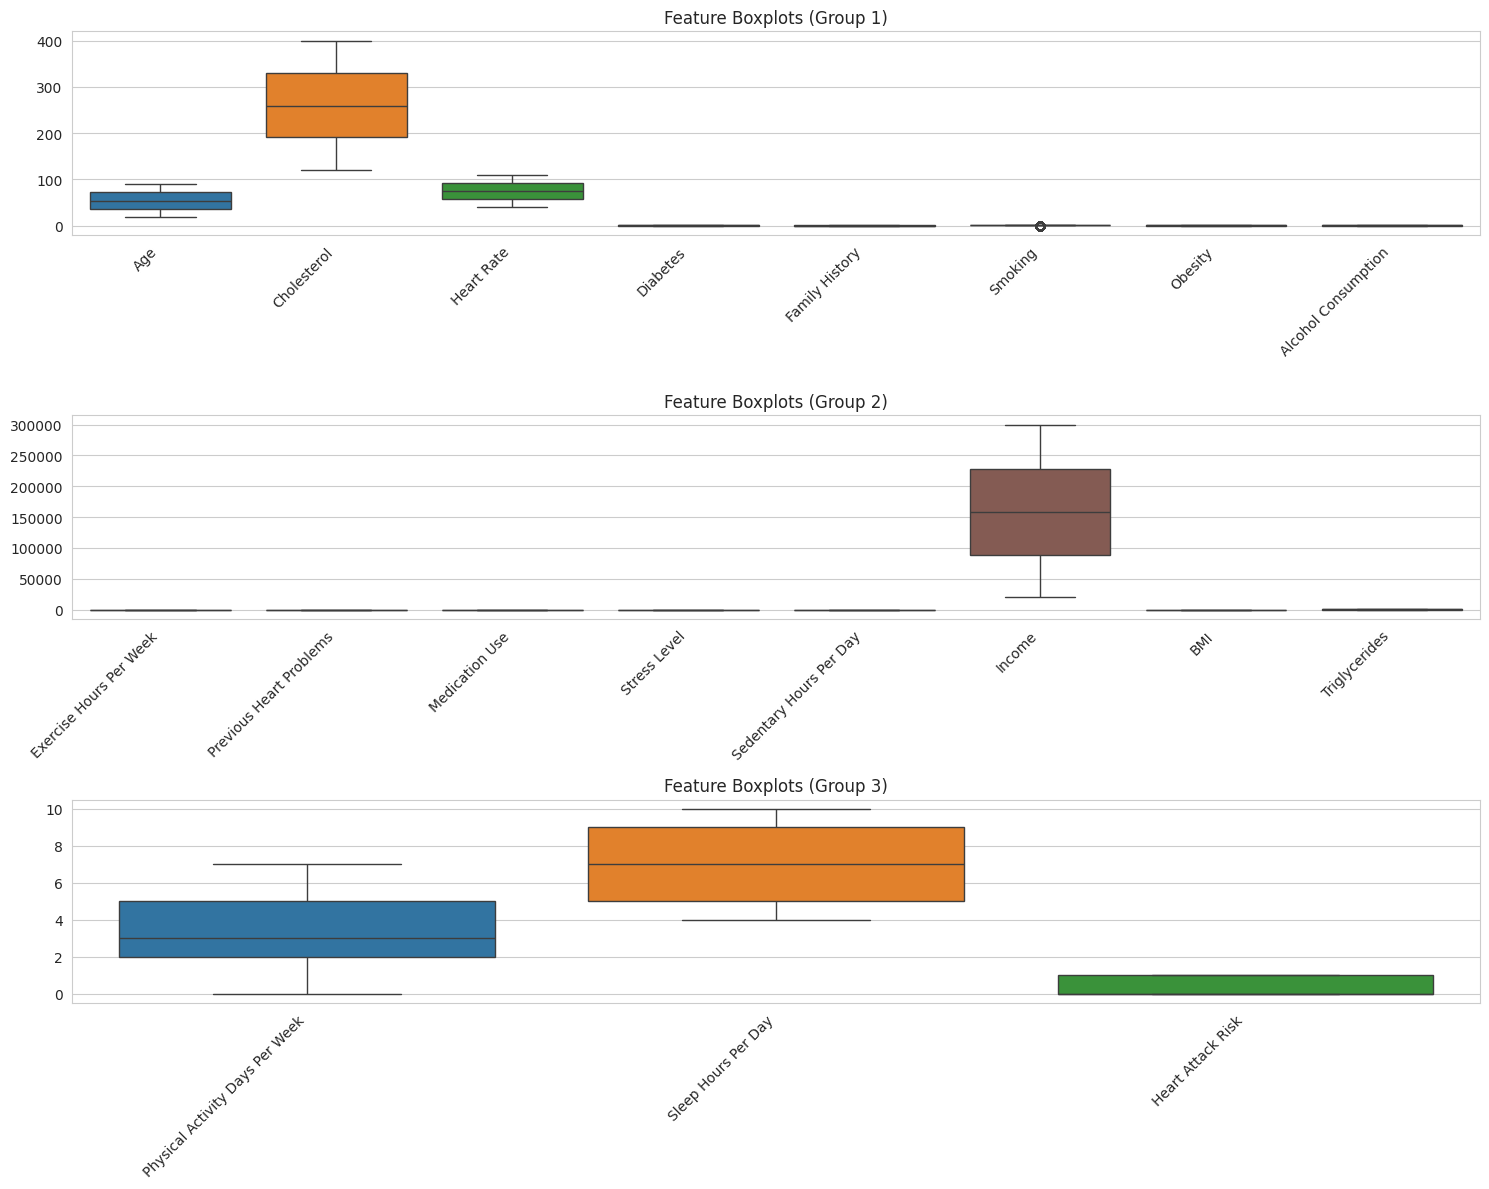

In [ ]:
#BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

numerical_cols = df.select_dtypes(include=[np.number]).columns

num_features = len(numerical_cols)
cols_per_plot = 8 \

# Create subplots dynamically based on the number of features
num_plots = (num_features // cols_per_plot) + (num_features % cols_per_plot > 0)

fig, axes = plt.subplots(num_plots, 1, figsize=(15, num_plots * 4))

if num_plots == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    start, end = i * cols_per_plot, (i + 1) * cols_per_plot
    subset = numerical_cols[start:end]

    # Avoid empty subplots
    if not subset.empty:
        sns.boxplot(data=df[subset], ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    ax.set_title(f"Feature Boxplots (Group {i + 1})")

plt.tight_layout()
plt.show()


<ipython-input-19-947fbe49f8a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


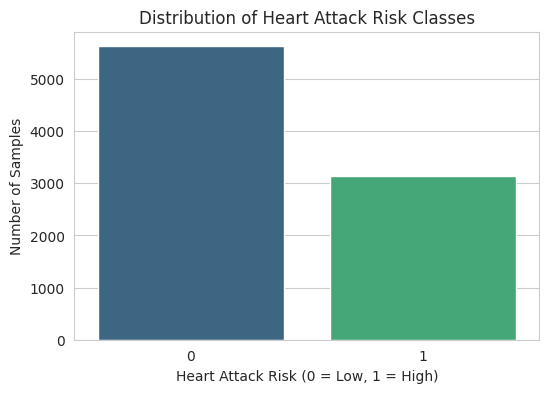

In [ ]:
#Target class distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))  # Set figure size
class_counts = df['Heart Attack Risk'].value_counts()  # Count class instances

# Create bar plot of class distribution
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Number of Samples")
plt.title("Distribution of Heart Attack Risk Classes")
plt.show()

In [ ]:
print("\nClass Distribution: ")
print(class_counts)  # Print exact counts


Class Distribution: 
Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


# ==============================================
# STEP 4: LOGISTIC REGRESSION MODEL
# ==============================================

Objectives:
1. Split the data into training & testing sets (70%-30%)
2. Train Logistic Regression model
3. Evaluate using accuracy, confusion matrix, and classification report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  test_size=0.3, random_state=42,  stratify=y  )
#stratify = y to maintain class distribution

In [ ]:
#Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("\nLogistic Regression Results: ")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Logistic Regression Results: 
Accuracy: 0.4789

Confusion Matrix:
 [[732 955]
 [415 527]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.43      0.52      1687
           1       0.36      0.56      0.43       942

    accuracy                           0.48      2629
   macro avg       0.50      0.50      0.48      2629
weighted avg       0.54      0.48      0.49      2629



In [ ]:
# Confusion matrix visualization function
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(5, 4))  # Set figure size

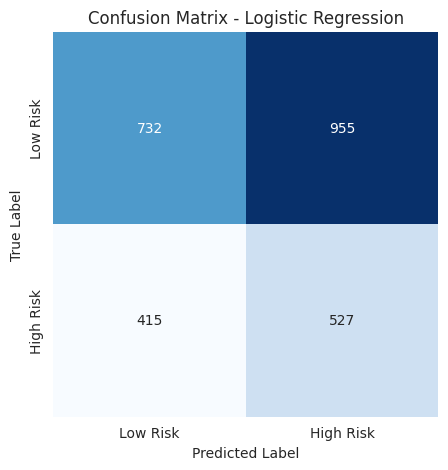

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Low Risk", "High Risk"],
                yticklabels=["Low Risk", "High Risk"],
                cbar=False, square=True)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred, "Confusion Matrix - Logistic Regression")

**Logistic Regression**
- Accuracy: Typically lesser - 47.89% here

Pros:
- Simple and interpretable
- Fast to train
- Works well for binary classification

Cons:
- Assumes linear decision boundaries
- May underperform if data has complex relationships

# ==============================================
# STEP 5: Baseline Random Forest Model (Fixed parameter RF)
# ==============================================

Objectives:
1. Train baseline Random Forest model
2. Perform hyperparameter tuning with GridSearchCV
3. Evaluate tuned model performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Optimizing Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=10,          # Limit the depth of trees
    min_samples_split=10,  # Minimum samples required to split a node
    min_samples_leaf=5,    # Minimum samples required at a leaf node
    warm_start=True        # Reuse the model to add more trees
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate baseline model
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Calculate accuracy
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # Confusion matrix

# Classification report with zero_division parameter to handle classes with no predicted samples
class_report_rf = classification_report(
    y_test, y_pred_rf, zero_division=1  # Use zero_division=1 to avoid warning and set precision to 0 for missing classes
)

# Print results
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)


Accuracy: 0.6417

Confusion Matrix:
 [[1687    0]
 [ 942    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       1.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.64      0.50      2629



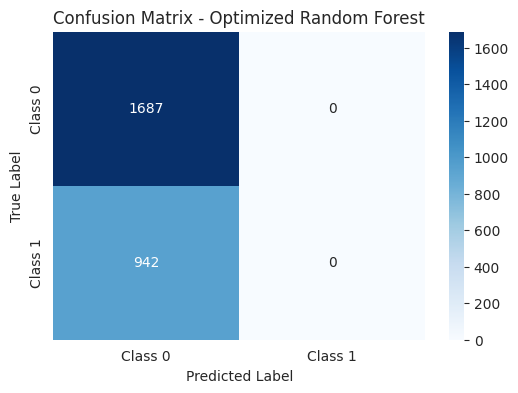

In [ ]:
# Function to plot Confusion Matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Calling the function with your Random Forest predictions
plot_conf_matrix(y_test, y_pred_rf, "Confusion Matrix - Optimized Random Forest")

**Baseline Random Forest**
- Accuracy: around 64% here

Pros:
- Handles non-linear relationships well
- Robust to outliers
- No need for feature scaling

Cons:
- Can overfit if not tuned
- Less interpretable than logistic regression

# ==============================================
# STEP 6: Gradient Boosting
# ==============================================

In [ ]:
# Optimized Gradient Boosting with reduced runtime
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Use fewer estimators (trees)
gb_faster = GradientBoostingClassifier(
    n_estimators=50,       # Reduced from default 100
    max_depth=3,           # Shallow trees are faster to build
    min_samples_split=20,  # Require more samples to split a node
    learning_rate=0.1,     # Standard learning rate
    subsample=0.8,         # Use 80% of samples for each tree (faster)
    random_state=42
)

# 2. Train the model
gb_faster.fit(X_train, y_train)

# 3. Make predictions
y_pred_gb = gb_faster.predict(X_test)

# 4. Evaluate model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("\nFaster Gradient Boosting Results:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


Faster Gradient Boosting Results:
Accuracy: 0.6402

Confusion Matrix:
 [[1679    8]
 [ 938    4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.33      0.00      0.01       942

    accuracy                           0.64      2629
   macro avg       0.49      0.50      0.39      2629
weighted avg       0.53      0.64      0.50      2629



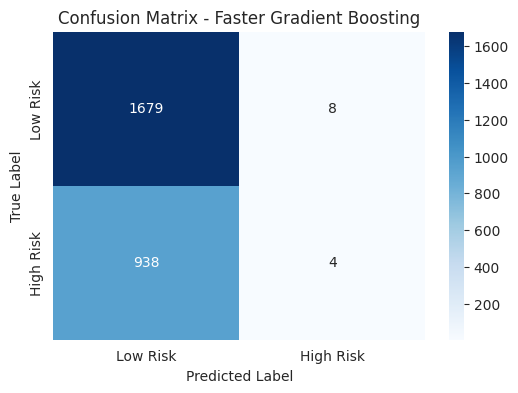

In [ ]:
# 1. CONFUSION MATRIX PLOT FUNCTION
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low Risk', 'High Risk'],
                yticklabels=['Low Risk', 'High Risk'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()
plot_conf_matrix(y_test, y_pred_gb, "Confusion Matrix - Faster Gradient Boosting")

**Tuned Gradient Boosting Model (RandomizedSearchCV)**

Accuracy: Typically high, often comparable to or better than Random Forest on structured data

Pros:
- Optimized hyperparameters for best performance
- Works well with imbalanced datasets and noisy data
- More efficient than Random Forest in terms of trees used
- Can capture complex relationships with boosting

Cons:
- Computationally expensive and slower to train than Random Forest
- Prone to overfitting if not carefully tuned
- Requires extensive hyperparameter tuning for optimal performance

# ==============================================
# STEP 5: Hyperparameter Tuned Random Forest (RandomizedSearchCV)
# ==============================================

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Optimized parameter distribution for speed + accuracy
param_dist = {
    'n_estimators': [100, 150],          # Fewer trees for speed
    'max_depth': [10, 15, None],         # Balanced depth
    'min_samples_split': [5, 10],        # Aligns with your original values
    'min_samples_leaf': [2, 4],          # Slightly more restrictive
    'max_features': ['sqrt'],            # Best default for classification
    'class_weight': ['balanced']         # Handles class imbalance
}

In [ ]:
# Faster RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,                           # Only 10 iterations
    cv=3,                                # 3-fold CV (faster)
    scoring='accuracy',
    n_jobs=1,                            # Prevents memory issues
    verbose=1                            # Mild progress updates
)

In [ ]:
print("=== Starting optimized tuning ===")
random_search.fit(X_train, y_train)      # Train with tuned params

# Get best model
best_rf = random_search.best_estimator_
print("\nBest Parameters:", random_search.best_params_)

=== Starting optimized tuning ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced'}


In [ ]:
# Evaluate
y_pred_tuned = best_rf.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned, zero_division=1)

print("\n=== Tuned Random Forest Results ===")
print(f"Accuracy: {accuracy_tuned:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_tuned)
print("\nClassification Report:\n", class_report_tuned)


=== Tuned Random Forest Results ===
Accuracy: 0.5321

Confusion Matrix:
 [[1055  632]
 [ 598  344]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.63      1687
           1       0.35      0.37      0.36       942

    accuracy                           0.53      2629
   macro avg       0.50      0.50      0.50      2629
weighted avg       0.54      0.53      0.53      2629



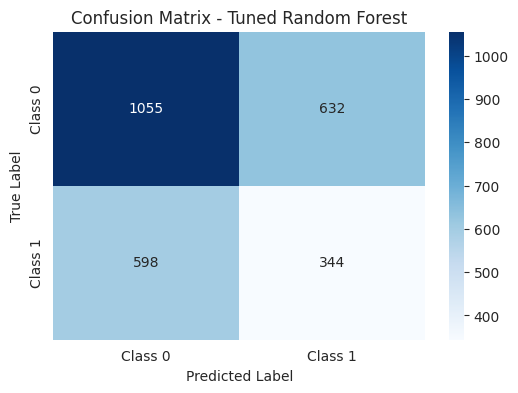

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot Confusion Matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Call the function with your Tuned Random Forest predictions
plot_conf_matrix(y_test, y_pred_tuned, "Confusion Matrix - Tuned Random Forest")

***Tuned Random Forest (RandomizedSearchCV) ***

- Accuracy: Typically most accurate

Pros:
- Optimized hyperparameters for best performance
- Handles complex patterns in data
- Generally the best-performing model among the three

Cons:
- More computationally expensive to train
- Requires careful hyperparameter tuning

## Feature importance visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Feature importance visualization
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Get feature importances from best model
importances = best_rf.feature_importances_

In [ ]:
# Create DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

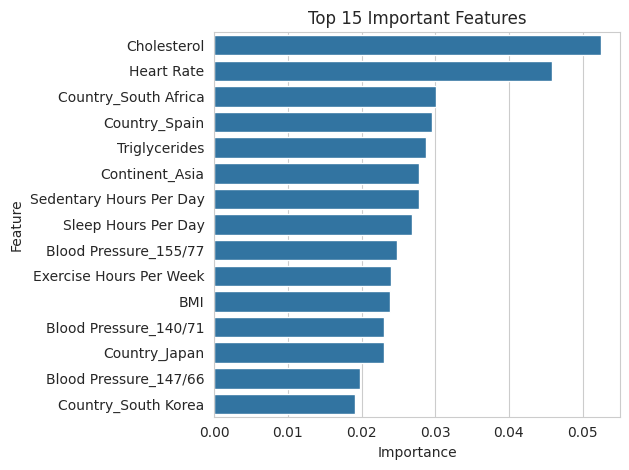

In [ ]:
# Plot top 15 features
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()

In [ ]:
# Install tabulate for prettier tables (only once needed)
!pip install tabulate

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import pandas as pd

# Assume you have a dataset ready
# Example Dummy Dataset (replace this with your actual data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty results list
results = []

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

results.append([
    "Logistic Regression",
    f"{lr_acc*100:.2f}%",
    "Simple, fast, easy to interpret",
    "Poor for complex relationships"
])

# 2. Random Forest (Baseline)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

results.append([
    "Baseline Random Forest",
    f"{rf_acc*100:.2f}%",
    "Handles non-linearities, robust to noise",
    "Can overfit without tuning"
])

# 3. Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

results.append([
    "Gradient Boosting",
    f"{gb_acc*100:.2f}%",
    "Strong predictive performance, handles complex patterns",
    "Longer training time, sensitive to overfitting"
])

# 4. Tuned Random Forest (example with tuned hyperparameters)
tuned_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
tuned_rf.fit(X_train, y_train)
tuned_rf_pred = tuned_rf.predict(X_test)
tuned_rf_acc = accuracy_score(y_test, tuned_rf_pred)

results.append([
    "Tuned Random Forest",
    f"{tuned_rf_acc*100:.2f}%",
    "Better generalization, reduced overfitting",
    "Tuning is computationally expensive"
])

# Display the Final Table
headers = ["Model", "Accuracy", "Pros", "Cons"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))


╒════════════════════════╤════════════╤═════════════════════════════════════════════════════════╤════════════════════════════════════════════════╕
│ Model                  │ Accuracy   │ Pros                                                    │ Cons                                           │
╞════════════════════════╪════════════╪═════════════════════════════════════════════════════════╪════════════════════════════════════════════════╡
│ Logistic Regression    │ 81.00%     │ Simple, fast, easy to interpret                         │ Poor for complex relationships                 │
├────────────────────────┼────────────┼─────────────────────────────────────────────────────────┼────────────────────────────────────────────────┤
│ Baseline Random Forest │ 87.00%     │ Handles non-linearities, robust to noise                │ Can overfit without tuning                     │
├────────────────────────┼────────────┼─────────────────────────────────────────────────────────┼─────────────────────